In [1]:
import pandas as pd

In [2]:
dp = pd.read_csv('M92_calibrated.dat',sep='\s+')

In [3]:
dp

,#id,x,y,Vvega,err,VIvega,err.1,Ivega,err.2,Vground,...,wV,wI,xsig,ysig,othv,othi,qfitV,qfitI,RA,Dec
0,1,2271.601,972.748,20.693,0.0070,0.588,0.0104,20.105,0.0077,20.847,...,1,1,0.005,0.003,0.000,0.000,0.043,0.050,259.294283,43.108123
1,2,2277.373,986.964,19.652,0.0043,0.483,0.0066,19.169,0.0050,19.764,...,1,1,0.005,0.006,0.000,0.000,0.053,0.042,259.294173,43.108320
2,3,2302.852,958.145,24.067,0.0339,0.970,0.0463,23.097,0.0314,24.353,...,1,1,0.020,0.026,0.000,0.000,0.176,0.136,259.293689,43.107920
3,4,2291.615,971.693,21.710,0.0112,0.773,0.0160,20.937,0.0114,21.932,...,1,1,0.014,0.011,0.000,0.000,0.046,0.057,259.293903,43.108108
4,5,2312.609,969.743,23.712,0.0287,0.992,0.0389,22.720,0.0263,24.004,...,1,1,0.044,0.049,0.000,0.000,0.101,0.118,259.293503,43.108081
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142965,142966,3777.358,5003.958,22.207,0.0135,0.860,0.0189,21.347,0.0132,22.458,...,1,1,0.006,0.013,0.001,0.001,0.072,0.060,259.265624,43.164111
142966,142967,3774.744,5031.808,20.780,0.0070,0.637,0.0103,20.143,0.0075,20.953,...,1,1,0.004,0.007,0.000,0.000,0.057,0.086,259.265674,43.164498
142967,142968,3802.429,5003.171,20.068,0.0050,0.501,0.0076,19.567,0.0058,20.188,...,1,1,0.014,0.006,0.000,0.000,0.026,0.030,259.265146,43.164100
142968,142969,3811.494,4989.475,22.587,0.0162,0.903,0.0224,21.684,0.0155,22.852,...,1,1,0.010,0.012,0.005,0.008,0.057,0.066,259.264974,43.163910


In [4]:
max(dp['err.1'].values)

99.999

In [ ]:
M92_fitstars

In [19]:
dp = pd.read_csv('M92_fitstars.dat',sep='\s+',skiprows=3, names=['vv', 'ii', 'vi'])
dp

,vv,ii,vi
0,15.926000,15.268000,0.658
1,15.927000,15.268000,0.659
2,15.927000,15.262000,0.665
3,15.931000,15.270001,0.661
4,15.932000,15.250000,0.682
...,...,...,...
18072,19.924999,19.403999,0.521
18073,19.924999,19.414000,0.511
18074,19.924999,19.396999,0.528
18075,19.924999,19.419001,0.506


In [26]:
float("{:.3f}".format(0.0005)) == 0.001

True

In [27]:
import time

In [44]:
dp_org = pd.read_csv('M92_calibrated.dat',sep='\s+')
dp_obs = pd.read_csv('M92_fitstars.dat',sep='\s+',skiprows=3, names=['vv', 'ii', 'vi'])
start_time = time.time()
len_org = len(dp_org)
V_list = []
I_list = []
VI_list = []
V_err_list = []
I_err_list = []
VI_err_list = []
for i in range(len(dp_obs)):
    j = 0
#    print(float("{:.3f}".format(dp_obs['vv'].values[i])))
#    print(float("{:.3f}".format(dp_obs['vi'].values[i])))
#    print(float("{:.3f}".format(dp_obs['ii'].values[i])))
    found = False
    while found == False and j < len_org:
        if float("{:.3f}".format(dp_obs['vv'].values[i])) != dp_org['Vvega'].values[j]:
            j += 1
        elif float("{:.3f}".format(dp_obs['vi'].values[i])) != dp_org['VIvega'].values[j]:
            j += 1
        elif float("{:.3f}".format(dp_obs['ii'].values[i])) != dp_org['Ivega'].values[j]:
            j += 1
        else:
            found = True
            V_list.append(dp_org['Vvega'].values[j])
            I_list.append(dp_org['Ivega'].values[j])
            VI_list.append(dp_org['VIvega'].values[j])
            V_err_list.append(dp_org['err'].values[j])
            I_err_list.append(dp_org['err.2'].values[j])
            VI_err_list.append(dp_org['err.1'].values[j])
end_time = time.time()
print(end_time - start_time)

4762.062998056412


In [32]:
float("{:.3f}".format(dp_obs['vv'].values[0]))

15.926

In [35]:
dp_org['Vvega'].values[0] == 20.693

True

In [40]:
print(float("{:.3f}".format(dp_obs['vv'].values[0])))
print(float("{:.3f}".format(dp_obs['vi'].values[0])))
print(float("{:.3f}".format(dp_obs['ii'].values[0])))
print(dp_org['Vvega'].values[101217])
print(dp_org['VIvega'].values[101217])
print(dp_org['Ivega'].values[101217])

15.926
0.658
15.268
15.926
0.658
15.268


In [46]:
d = {'vv': V_list,'vv_err': V_err_list, 'vi': VI_list,'vi_err': VI_err_list, 'ii': I_list,'ii_err': I_err_list}
df = pd.DataFrame(data=d)
df

,vv,vv_err,vi,vi_err,ii,ii_err
0,15.926,0.0034,0.658,0.0050,15.268,0.0037
1,15.927,0.0035,0.659,0.0052,15.268,0.0039
2,15.927,0.0035,0.665,0.0052,15.262,0.0038
3,15.931,0.0034,0.661,0.0051,15.270,0.0038
4,15.932,0.0034,0.682,0.0051,15.250,0.0038
...,...,...,...,...,...,...
18072,19.925,0.0480,0.521,0.0577,19.404,0.0320
18073,19.925,0.0060,0.511,0.0092,19.414,0.0070
18074,19.925,0.0300,0.528,0.0304,19.397,0.0050
18075,19.925,0.0050,0.506,0.0112,19.419,0.0100


In [49]:
df.to_csv('M92_fits_with_err',index=False)

In [5]:
dp = pd.read_csv('M92_fits_with_err')
dp

,vv,vv_err,vi,vi_err,ii,ii_err
0,15.926,0.0034,0.658,0.0050,15.268,0.0037
1,15.927,0.0035,0.659,0.0052,15.268,0.0039
2,15.927,0.0035,0.665,0.0052,15.262,0.0038
3,15.931,0.0034,0.661,0.0051,15.270,0.0038
4,15.932,0.0034,0.682,0.0051,15.250,0.0038
...,...,...,...,...,...,...
18072,19.925,0.0480,0.521,0.0577,19.404,0.0320
18073,19.925,0.0060,0.511,0.0092,19.414,0.0070
18074,19.925,0.0300,0.528,0.0304,19.397,0.0050
18075,19.925,0.0050,0.506,0.0112,19.419,0.0100


In [7]:
max(dp['vi_err'].values)

2.3823

In [8]:
max(dp['vv_err'].values)

1.728

(array([1.8049e+04, 1.8000e+01, 8.0000e+00, 1.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([0.      , 0.119115, 0.23823 , 0.357345, 0.47646 , 0.595575,
        0.71469 , 0.833805, 0.95292 , 1.072035, 1.19115 , 1.310265,
        1.42938 , 1.548495, 1.66761 , 1.786725, 1.90584 , 2.024955,
        2.14407 , 2.263185, 2.3823  ]),
 <BarContainer object of 20 artists>)

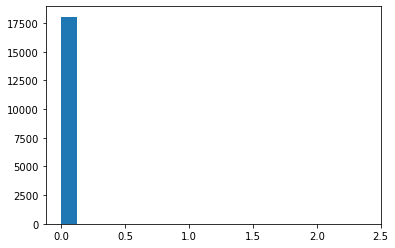

In [9]:
import matplotlib.pyplot as plt
plt.hist(dp['vi_err'].values,bins=20)

In [10]:
dp.sort_values(by='vv_err')

,vv,vv_err,vi,vi_err,ii,ii_err
9861,19.224,0.000,0.456,0.0060,18.768,0.006
8366,19.062,0.000,0.467,0.0240,18.595,0.024
9772,19.216,0.000,0.457,0.0130,18.759,0.013
7516,18.963,0.000,0.440,0.0040,18.523,0.004
15883,19.756,0.000,0.496,0.0520,19.260,0.052
...,...,...,...,...,...,...
13422,19.561,0.240,0.530,0.2570,19.031,0.092
3027,18.304,0.276,0.377,0.2807,17.927,0.051
6277,18.817,0.282,0.491,0.2887,18.326,0.062
204,16.426,0.425,0.707,0.4507,15.719,0.150


In [15]:
df = dp.drop([10249]).copy()

In [16]:
df.sort_values(by='vv_err')

,vv,vv_err,vi,vi_err,ii,ii_err
9861,19.224,0.000,0.456,0.0060,18.768,0.006
8366,19.062,0.000,0.467,0.0240,18.595,0.024
9772,19.216,0.000,0.457,0.0130,18.759,0.013
7516,18.963,0.000,0.440,0.0040,18.523,0.004
15883,19.756,0.000,0.496,0.0520,19.260,0.052
...,...,...,...,...,...,...
2548,18.203,0.218,0.383,0.2309,17.820,0.076
13422,19.561,0.240,0.530,0.2570,19.031,0.092
3027,18.304,0.276,0.377,0.2807,17.927,0.051
6277,18.817,0.282,0.491,0.2887,18.326,0.062


In [17]:
df.to_csv('M92_fits_with_err',index=False)